<a href="https://colab.research.google.com/github/ucfilho/optim_raianars/blob/master/ANN_parte_002_ajuste_ann_SET_11_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/ucfilho/optim_raianars/ #clonar do Github
%cd optim_raianars
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'optim_raianars' already exists and is not an empty directory.
/content/optim_raianars
Hello world
I'm evolving!!!



In [0]:
X_NOME=['DI RELATIVO','FRAC Its','VELOC FOBJ',
        'VELOC X','DELTA FOBJ','DELTA VX']
Y_NOME=['NP','F','CR']

In [0]:
ARQ_X='X_DAT_set_11_2019.csv'
X=pd.read_csv(ARQ_X)
X=X[X_NOME]
#print(X.head())

In [0]:
ARQ_Y='Y_DAT_set_11_2019.csv'

Y=pd.read_csv(ARQ_Y)
#Y=Y[Y_NOME[2]] ???
Y=Y[Y_NOME]
#print(Y.head())

In [0]:
XX=X.loc[X['VELOC X']==X['VELOC X'],X_NOME].values
y=Y.loc[Y['NP']==Y['NP'],['CR']].values

In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x):
    strings=list(x)
    for featur in strings:
        max_feat=x[featur].max()
        min_feat=x[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [0]:
Num=len(y_calc)
print(Num)
Id=np.random.randn(1, Num)
print(Id)

50
[[-0.05152993  0.01312891  0.20223906  0.45495224 -0.39926817  0.18106742
   0.80748795  0.81253519  0.21090203  0.42177915  0.58192518 -0.41020752
   2.2968661   1.68849705  0.62581147 -1.61136381  0.06009774  0.46242079
   0.68483649 -0.59546033  0.99905124 -0.30817074  0.36583834  1.60750704
  -0.23817737 -0.34082828  0.48759421  1.73907303  0.0689698   0.47324139
  -0.65035502 -0.77910696 -0.77766271  0.6225628   0.42756207  0.0740096
  -0.4531686   0.60415364  2.38520581 -0.12388333 -0.32419367  0.31075423
   2.46162831 -0.31612369 -1.81506277  0.6842495   0.03203253  0.19627021
   0.90745116 -2.13483482]]


In [0]:
# input dataset
#Neuron_input=3
Neuron_input=len(X_NOME)
Neuron_hidden=15
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=50000

In [0]:
y_old=Y.loc[Y['NP']==Y['NP'],['CR']].values
#y_old=DAT['TC1']
#DAT=normatize(DAT)
Y=normatize(Y)
X=normatize(X)
#print(X.head())

In [0]:
#print(Y)

Epoch 0 error:0.3661697132739514
Epoch 500 error:0.2033864996752046
Epoch 1000 error:0.19697951514677695
Epoch 1500 error:0.19150042838316772
Epoch 2000 error:0.18863554013615186
Epoch 2500 error:0.18517515744110657
Epoch 3000 error:0.18006407268118355
Epoch 3500 error:0.17401731458300593
Epoch 4000 error:0.16786535278999296
Epoch 4500 error:0.16284257271427255
Epoch 5000 error:0.15851208434338776
Epoch 5500 error:0.15549126413978245
Epoch 6000 error:0.1529681719910982
Epoch 6500 error:0.15053234275306468
Epoch 7000 error:0.1485984787080548
Epoch 7500 error:0.1470252652834484
Epoch 8000 error:0.14573698491804302
Epoch 8500 error:0.1446013606398549
Epoch 9000 error:0.14318591495988187
Epoch 9500 error:0.14290806948298138
Epoch 10000 error:0.14195949163190252
Epoch 10500 error:0.14107727942965675
Epoch 11000 error:0.14036235279078457
Epoch 11500 error:0.13905950506429338
Epoch 12000 error:0.1387349527514849
Epoch 12500 error:0.13758634794706956
Epoch 13000 error:0.1367335743277964
Epoch 

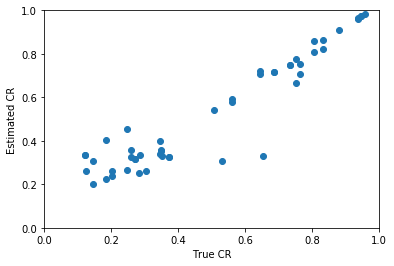

In [0]:


#X=DAT.loc[DAT['Speed']==DAT['Speed'],['Speed','Feed','Hard']].values
#y=DAT.loc[DAT['Speed']==DAT['Speed'],['TC1']].values
XX=X.loc[X['VELOC X']==X['VELOC X'],X_NOME].values
y=Y.loc[Y['NP']==Y['NP'],['CR']].values
X=XX
np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1


for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 500) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate

#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_old
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
#y_old=pd.DataFrame({'y_old':y_old})
y_old=pd.DataFrame(y_old)
y_old.columns = ["y_old"]
y_calc=original(y_calc,y_old)


plt.scatter(y_obs,y_calc)
plt.xlabel("True CR")
plt.ylabel("Estimated CR")
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()
#'''

In [0]:
#print(y_old)
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
y_old=pd.DataFrame(y_old)
y_old.columns = ["y_old"]
#print(y_calc)
#print(y_old)
#print(l2)
#print(np.reshape(l2,len(l2)))

In [0]:
print(l0)

[[1.31434291e-01 1.78253119e-03 0.00000000e+00 0.00000000e+00
  5.00000000e-01 5.00000000e-01]
 [8.65905372e-02 6.41711230e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [6.73223872e-02 2.07664884e-01 0.00000000e+00 1.00000000e+00
  0.00000000e+00 5.00000000e-01]
 [2.59582216e-02 3.32442068e-01 5.00000000e-01 1.00000000e+00
  7.50000000e-01 5.00000000e-01]
 [6.18532974e-03 4.63458111e-01 1.00000000e+00 1.00000000e+00
  7.50000000e-01 5.00000000e-01]
 [1.89602565e-02 6.06951872e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.27235319e-04 6.81818182e-01 1.00000000e+00 5.00000000e-01
  1.00000000e+00 7.50000000e-01]
 [1.04757089e-04 7.94117647e-01 1.00000000e+00 1.00000000e+00
  5.00000000e-01 7.50000000e-01]
 [1.00994775e-04 8.75222816e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.81047877e-04 1.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 5.00000000e-01]
 [1.00000000e+00 4.17112299e-02 0.00000000e+00 0.0

In [0]:
print(l1)

[[2.22818707e-01 4.36724254e-01 6.00465459e-02 3.79865553e-01
  2.90434128e-01 2.66126022e-01 4.32195280e-01 4.10010058e-01
  5.29824425e-01 4.46659095e-01 6.75735004e-01 4.06780319e-01
  4.01466751e-01 4.82778909e-01 4.01845335e-01]
 [3.09774951e-02 2.78382236e-01 1.73794890e-02 6.40318883e-02
  4.97645456e-02 6.84322602e-02 3.10897594e-01 7.02679422e-02
  5.83038600e-02 5.10396059e-02 5.33362090e-01 3.11875045e-01
  8.73360273e-03 1.71595806e-01 2.62301168e-01]
 [2.45901959e-01 7.65088090e-01 5.04856617e-02 1.71012431e-01
  1.76671468e-01 8.66306519e-02 6.67107479e-01 1.34209191e-01
  2.29960426e-01 7.33820699e-02 3.29625935e-02 7.60720940e-02
  9.78236509e-02 2.36768494e-01 7.40825081e-01]
 [6.35768068e-02 4.29419446e-01 5.96671275e-02 8.23187001e-02
  5.55490544e-02 6.99657142e-02 5.54874662e-01 8.34924626e-02
  1.48640754e-01 1.74797089e-01 5.23155000e-01 1.36571782e-02
  8.60640739e-03 1.83248921e-01 6.62047190e-01]
 [1.35601323e-01 2.87138417e-01 1.55301709e-01 5.57142511e-02
  

In [0]:
print(l2)

[[0.69683547]
 [0.64939511]
 [1.00017464]
 [0.54517655]
 [0.75072552]
 [0.25856297]
 [0.83788856]
 [0.8828085 ]
 [0.09288351]
 [0.14006266]
 [0.49991248]
 [0.16641293]
 [1.02660516]
 [0.93905347]
 [0.15754501]
 [0.2473042 ]
 [0.25511312]
 [0.24885692]
 [0.22244433]
 [0.16433156]
 [0.75138341]
 [0.78160457]
 [1.00678494]
 [0.56388194]
 [0.74574978]
 [0.33235397]
 [0.88594882]
 [0.81734616]
 [0.22153184]
 [0.16433155]
 [0.69775612]
 [0.17125584]
 [1.01959823]
 [0.7105405 ]
 [0.33504342]
 [0.24525182]
 [0.25606469]
 [0.24467451]
 [0.23015991]
 [0.28029127]
 [0.71308478]
 [0.39568203]
 [1.01618623]
 [0.71048974]
 [0.12252032]
 [0.28207571]
 [0.25606285]
 [0.24467442]
 [0.23015991]
 [0.27430084]]
